In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing dataset

In [2]:
data = pd.read_csv("/home/ganeshkasturi/Desktop/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# changing the column name of the dataset.
data.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

In [6]:
data.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 # Data Exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                      303 non-null int64
Gender                   303 non-null int64
ChestPain                303 non-null int64
RestingBloodPressure     303 non-null int64
Cholestrol               303 non-null int64
FastingBloodSugar        303 non-null int64
RestingECG               303 non-null int64
MaxHeartRateAchivied     303 non-null int64
ExerciseIndusedAngina    303 non-null int64
Oldpeak                  303 non-null float64
Slope                    303 non-null int64
MajorVessels             303 non-null int64
Thalassemia              303 non-null int64
Target                   303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
data.describe()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Exploration

* Bad Rate Analysis
* Bivariate Analysis 

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.shape

(303, 14)

In [11]:
data.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

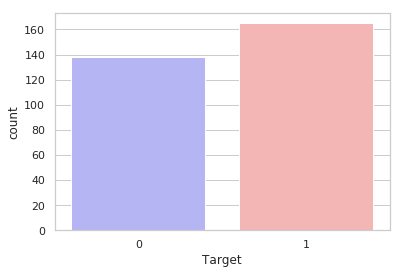

In [12]:
sns.countplot(x ='Target',data=data,palette='bwr')

# Visualizations

In [13]:
countNoDisease = len(data[data.Target == 0])
countHaveDisease = len(data[data.Target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.Target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.Target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [14]:
data.groupby('Target').mean()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia
Target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


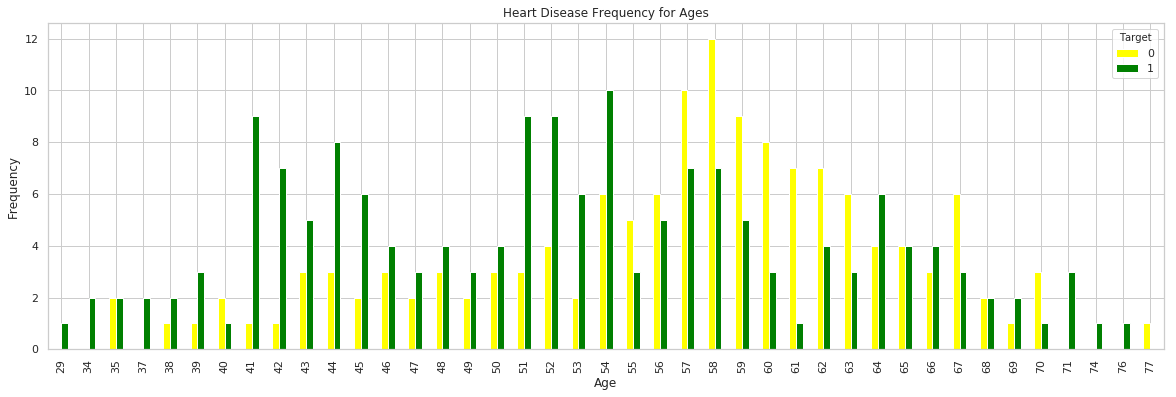

In [15]:
pd.crosstab(data.Age,data.Target).plot(kind="bar",figsize=(20,6),color=('yellow','green'))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [16]:
# Get the Maximum value.    # According to the dataset the Maximum Age.
print('Maximum value in column Age : ',data['Age'].max())

Maximum value in column Age :  77


In [17]:
# Get the Minimun value.
print('Minimum value in column Age : ',data['Age'].min())

Minimum value in column Age :  29


In [18]:
data['Age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

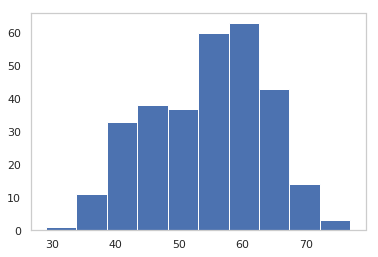

In [19]:
data['Age'].hist(grid=False) # By using histogram.

In [20]:
data.groupby('Gender')['Age'].mean()

Gender
0    55.677083
1    53.758454
Name: Age, dtype: float64

In [21]:
data.head(2)

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [22]:
# Comparing according to the Age,Gender the Average ChestPain in the dataset.
data.groupby(['Age','Gender'])['ChestPain'].mean()

Age  Gender
29   1         1.000000
34   0         1.000000
     1         3.000000
35   0         0.000000
     1         0.333333
37   0         2.000000
     1         2.000000
38   1         2.333333
39   0         2.000000
     1         1.000000
40   1         1.000000
41   0         1.250000
     1         1.166667
42   0         1.000000
     1         1.333333
43   0         1.000000
     1         0.333333
44   0         2.000000
     1         1.000000
45   0         0.666667
     1         0.800000
46   0         1.000000
     1         0.750000
47   1         1.200000
48   0         2.000000
     1         0.666667
49   0         0.500000
     1         1.666667
50   0         1.000000
     1         1.000000
                 ...   
57   1         0.615385
58   0         1.000000
     1         0.769231
59   0         0.000000
     1         1.307692
60   0         1.750000
     1         0.285714
61   0         0.000000
     1         0.833333
62   0         0.285714
    

In [23]:
# How many Male and Female in the dataset.
data['Gender'].value_counts()

1    207
0     96
Name: Gender, dtype: int64

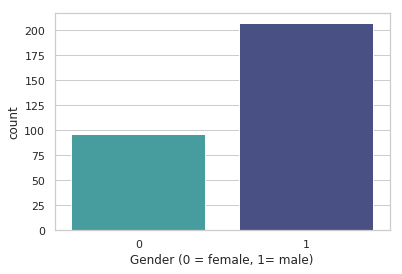

In [24]:
sns.countplot(x='Gender', data=data, palette="mako_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

In [25]:
countFemale = len(data[data.Gender == 0])
countMale = len(data[data.Gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.Gender))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


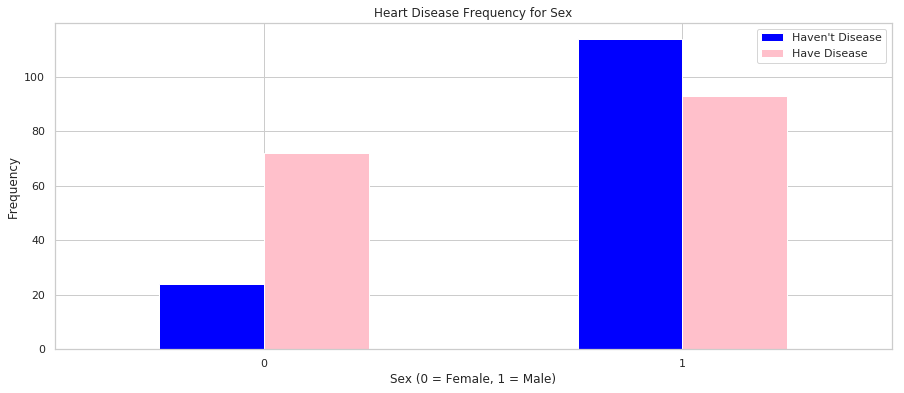

In [26]:
pd.crosstab(data.Gender,data.Target).plot(kind="bar",figsize=(15,6),color=['Blue','Pink' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [27]:
data.head(2)

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


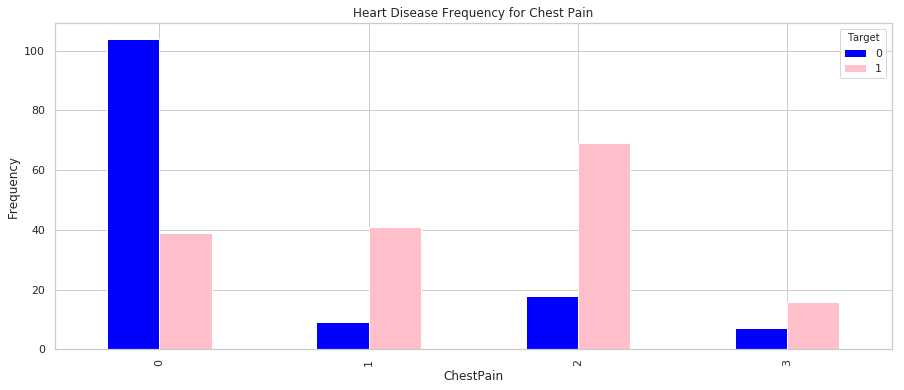

In [28]:
pd.crosstab(data.ChestPain,data.Target).plot(kind="bar",figsize=(15,6),color=['Blue','Pink' ])
plt.title('Heart Disease Frequency for Chest Pain')
plt.ylabel('Frequency')
plt.show()

# Identify & Treatment of Outlier 

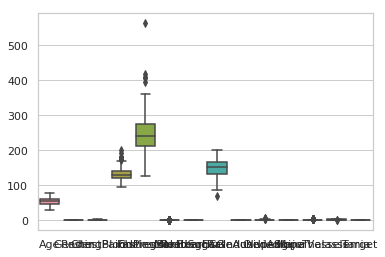

In [29]:
sns.boxplot(data=data)  # Single Variable

In [30]:
q1 = data['RestingBloodPressure'].quantile(0.25)
q3 = data['RestingBloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(90.0, 170.0)

In [31]:
data['RestingBloodPressure']=np.where(data['RestingBloodPressure'] > high,high,data['RestingBloodPressure']) # upper limit

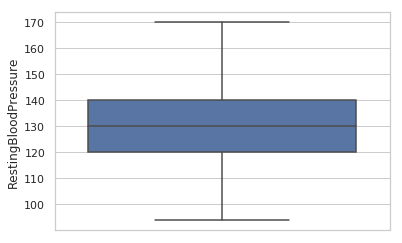

In [32]:
sns.boxplot(y='RestingBloodPressure',data=data) 

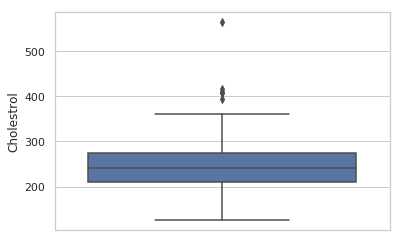

In [33]:
sns.boxplot(y='Cholestrol',data =data)

In [34]:
q1 = data['Cholestrol'].quantile(0.25)
q3 = data['Cholestrol'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(115.75, 369.75)

In [35]:
data['Cholestrol']=np.where(data['Cholestrol'] > high,high,data['Cholestrol']) # upper limit

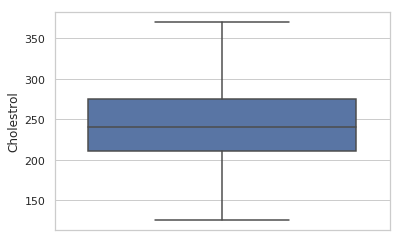

In [36]:
sns.boxplot(y='Cholestrol',data =data)

# Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [37]:
data_final=data

In [38]:
# define our input variable (X) & output variable
X = data_final.drop('Target', axis = 1)
Y = data_final[['Target']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Performing Logistic Regression

In [39]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)
b=smf.Logit(y_train,X_1)
result=b.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.317680
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.539     
Dependent Variable:   Target            AIC:               162.6962  
Date:                 2019-10-26 15:23  BIC:               209.6884  
No. Observations:     212               Log-Likelihood:    -67.348   
Df Model:             13                LL-Null:           -146.18   
Df Residuals:         198               LLR p-value:       5.8411e-27
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                  2.9971   3.3081  0.9060 0.3649 -3.4867  9.4810
Age             

/home/ganeshkasturi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Backward Elimination

In [40]:
cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X_train[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    model=sm.Logit(y_train,X_1).fit() # Regression model
    p = pd.Series(model.pvalues.values[1:],index = cols) # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

Optimization terminated successfully.
         Current function value: 0.317680
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.318361
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.318984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.319800
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.327080
         Iterations 8


In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            8
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                  0.5257
Time:                        15:23:17   Log-Likelihood:                -69.341
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 3.342e-29
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1221      2.440     -0.050      0.960      -4.904       4.660
Gender                   -2.1536      0.584     -3.689      0.000      -3.298      -1.009
ChestPain                 1.2734      0.256      4.982      0.000       0.772       1.774
RestingBloodPressure     -0.0277      0.014     -2.000      0.046      -0.055      -0.001
RestingECG                0.8801      0.440      2.001      0.045       0.018       1.742
MaxHeartRateAchivied      0.0363      0.013      2.887      0.004       0.012       0.061
ExerciseIndusedAngina    -1.2246      0.521     -2.351      0.019      -2.245      -0.204
Oldpeak                  -0.9585      0.255     -3.760      0.000      -1.458      -0.459
MajorVessels             -0.6674      0.219     -3.042      0.002      -1.097      -0.237
=========================================================================================
"""

# Predictions on Train Dataset

In [42]:
y_predict=model.predict(X_1)

In [43]:
train=pd.concat([X_train,y_train],axis=1)

In [44]:
train['Probs']=y_predict
train['Predicted']=0
train.loc[(train['Probs']> 0.7),'Predicted']=1

In [45]:
# sort the pandas dataframe by descending value of single column
train.sort_values(by='Target',ascending=0,inplace=True)

In [46]:
train.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target,Probs,Predicted
34,51,1,3,125.0,213.0,0,0,125,1,1.4,2,1,2,1,0.350027,0
65,35,0,0,138.0,183.0,0,1,182,0,1.4,2,0,2,1,0.899663,1
149,42,1,2,130.0,180.0,0,1,150,0,0.0,2,0,2,1,0.952109,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1,0.920253,1
52,62,1,2,130.0,231.0,0,1,146,0,1.8,1,3,3,1,0.292603,0


In [47]:
# sort the pandas dataframe by descending value of single column
train.sort_values(by='Gender',inplace=True)

In [48]:
train.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target,Probs,Predicted
147,60,0,3,150.0,240.0,0,1,171,0,0.9,2,0,2,1,0.996864,1
109,50,0,0,110.0,254.0,0,0,159,0,0.0,2,0,2,1,0.930659,1
15,50,0,2,120.0,219.0,0,1,158,0,1.6,1,0,2,1,0.984886,1
25,71,0,1,160.0,302.0,0,1,162,0,0.4,2,2,2,1,0.852698,1
153,66,0,2,146.0,278.0,0,0,152,0,0.0,1,1,2,1,0.961772,1


 # Model Performance Metrics

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Target'], train['Predicted'])
print(confusion_matrix)

[[88  9]
 [26 89]]


In [50]:
Accuracy_Train=((88+89)/(88+89+9+26)*100)
print(Accuracy_Train)

83.49056603773585


 # Predictions on Test Dataset

In [51]:
model.params

const                   -0.122126
Gender                  -2.153603
ChestPain                1.273414
RestingBloodPressure    -0.027701
RestingECG               0.880069
MaxHeartRateAchivied     0.036264
ExerciseIndusedAngina   -1.224624
Oldpeak                 -0.958499
MajorVessels            -0.667391
dtype: float64

In [52]:
X_test.columns

Index(['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels',
       'Thalassemia'],
      dtype='object')

In [53]:
abc=X_test[['Gender', 'ChestPain', 'RestingBloodPressure', 'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak','MajorVessels']]

In [54]:
abc=sm.add_constant(abc)

/home/ganeshkasturi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
abc.columns

Index(['const', 'Gender', 'ChestPain', 'RestingBloodPressure', 'RestingECG',
       'MaxHeartRateAchivied', 'ExerciseIndusedAngina', 'Oldpeak',
       'MajorVessels'],
      dtype='object')

In [56]:
y_prediction=model.predict(abc)

In [57]:
test=pd.concat([X_test,y_test],axis=1)

In [58]:
test['Probs']=y_prediction

In [59]:
def conditions(test):
    if (test['Probs']> 0.7):
        return 1
    else:
        return 0

In [60]:
test['Predicted'] = test.apply(conditions, axis=1)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Target'], test['Predicted'])
print(confusion_matrix)

[[33  8]
 [14 36]]


In [62]:
Accuracy_test=((33+36)/(33+36+8+14)*100)
Accuracy_test

75.82417582417582

In [63]:
X_train_1=X_train[['Gender', 'ChestPain', 'RestingBloodPressure', 'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak','MajorVessels']]

In [64]:
X_test_1=X_test[['Gender', 'ChestPain', 'RestingBloodPressure', 'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak','MajorVessels']]

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.82      0.72      0.77        50

   micro avg       0.76      0.76      0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model_2=logreg.fit(X_train_1, y_train)

/home/ganeshkasturi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ganeshkasturi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Step 10 :- ROCR & KS PLOT

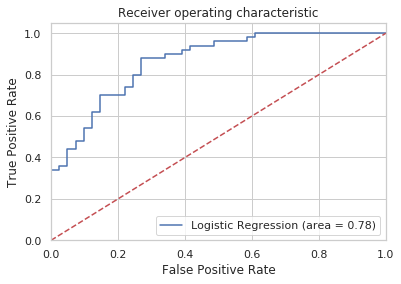

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_2.predict(X_test_1))
fpr, tpr, thresholds = roc_curve(y_test, model_2.predict_proba(X_test_1)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()